# California Housing with Tax (Example "perfect predictor") 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
sns.set()

In [2]:
# Read the CSV data file from the object storage into a pandas DataFrame
original_data = pd.read_csv('housing-with-tax.csv')
original_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_tax
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,85994.0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,68115.0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,66899.0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,64847.0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,65018.0


In [3]:
data_wo_null = original_data.dropna(axis=0)
data_wo_null.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
median_tax            0
dtype: int64

In [4]:
data_reduced_features = data_wo_null[['housing_median_age', 'total_rooms','population', 'median_income', 'median_house_value','ocean_proximity', 'median_tax']]
data_reduced_features.head()

,housing_median_age,total_rooms,population,median_income,median_house_value,ocean_proximity,median_tax
0,41,880,322,8.3252,452600,NEAR BAY,85994.0
1,21,7099,2401,8.3014,358500,NEAR BAY,68115.0
2,52,1467,496,7.2574,352100,NEAR BAY,66899.0
3,52,1274,558,5.6431,341300,NEAR BAY,64847.0
4,52,1627,565,3.8462,342200,NEAR BAY,65018.0


In [5]:
df_dummies = pd.get_dummies(data_reduced_features, drop_first=True) # 0-1 encoding for categorical values
df_dummies.head()

,housing_median_age,total_rooms,population,median_income,median_house_value,median_tax,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41,880,322,8.3252,452600,85994.0,0,0,1,0
1,21,7099,2401,8.3014,358500,68115.0,0,0,1,0
2,52,1467,496,7.2574,352100,66899.0,0,0,1,0
3,52,1274,558,5.6431,341300,64847.0,0,0,1,0
4,52,1627,565,3.8462,342200,65018.0,0,0,1,0


In [6]:
target = df_dummies['median_house_value'] # feature to be predicted
predictors = df_dummies.drop(['median_house_value'], axis = 1) # all other features are used as predictors

In [7]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=123) # 80-20 split into training and test data

In [8]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [10]:
print('training performance')
print(reg.score(X_train,y_train))
print('test performance')
print(reg.score(X_test,y_test))

training performance
1.0
test performance
1.0


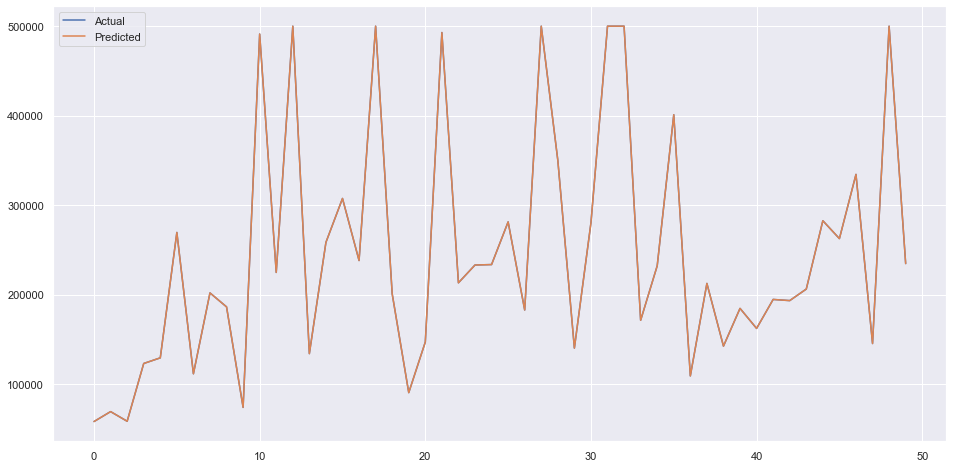

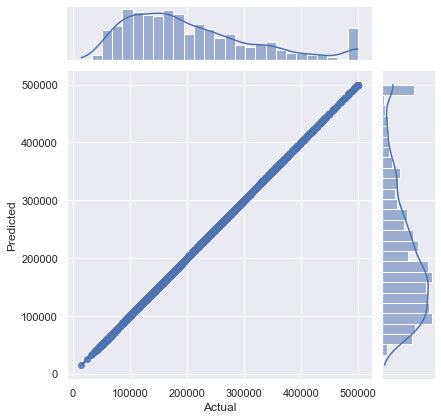

In [11]:
y_pred = reg.predict(X_test)
test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);